## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how= "left", on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice (starting with 249 unique IDs)
combined_data["Mouse ID"].value_counts(normalize=True)

g989    0.006867
c766    0.005283
x401    0.005283
s710    0.005283
c559    0.005283
          ...   
t573    0.000528
o848    0.000528
v199    0.000528
n482    0.000528
h428    0.000528
Name: Mouse ID, Length: 249, dtype: float64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df= combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
print(duplicates_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data= combined_data[combined_data["Mouse ID"] == "g989"].index

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(dup_data, inplace= True)

In [6]:
# Checking the number of mice in the clean DataFrame (now 248 once duplicate was dropped)
combined_data["Mouse ID"].value_counts(normalize=True)

c766    0.005319
t198    0.005319
s710    0.005319
c559    0.005319
o562    0.005319
          ...   
v199    0.000532
x336    0.000532
u153    0.000532
t573    0.000532
d133    0.000532
Name: Mouse ID, Length: 248, dtype: float64

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Groupby drug regimen
summary_df= combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]

drug_summary= summary_df.groupby(["Drug Regimen"])

# Assemble the resulting series into a single summary dataframe.
drug_group_mean= drug_summary.mean()
drug_group_mean= drug_group_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Vol (mm3)"})
drug_group_mean.head()

,Average Tumor Vol (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_median= drug_summary.median()
drug_group_median= drug_group_median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Vol (mm3)"})

drug_group_var= drug_summary.var()
drug_group_var= drug_group_var.rename(columns={"Tumor Volume (mm3)": "Variance in Tumor Vol"})

drug_group_std= drug_summary.std()
drug_group_std= drug_group_std.rename(columns={"Tumor Volume (mm3)": "Standard Deviation in Tumor Vol (mm3)"})

drug_group_sem= drug_summary.sem()
drug_group_sem= drug_group_sem.rename(columns={"Tumor Volume (mm3)": "Standard Error of Mean"})

# Using the aggregation method, produce the same summary statistics in a single line
drug_group_final= pd.concat([drug_group_mean, drug_group_median, drug_group_var, drug_group_std, drug_group_sem], axis= 1)
drug_group_final

,Average Tumor Vol (mm3),Median Tumor Vol (mm3),Variance in Tumor Vol,Standard Deviation in Tumor Vol (mm3),Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Find uniques
bar_graph_df= combined_data[["Mouse ID", "Drug Regimen"]]
bar_data= bar_graph_df.groupby("Drug Regimen").nunique()
del bar_data["Drug Regimen"]
bar_data

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


In [10]:
# Set variables
bar_data["Drug Regimen"]= bar_data.index
total_mice= bar_data["Mouse ID"]
drug_regimen= bar_data["Drug Regimen"]

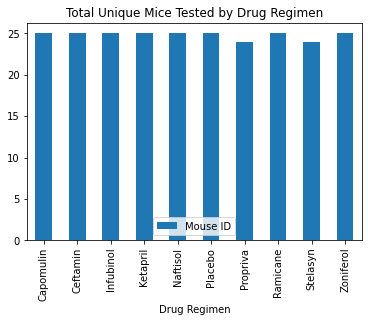

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_data.plot(kind="bar", title="Total Unique Mice Tested by Drug Regimen")

Text(0.5, 1.0, 'Total Unique Mice Tested by Drug Regimen')

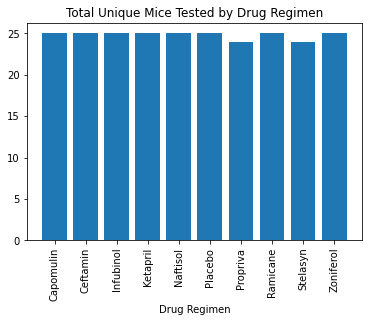

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
plt.bar(drug_regimen, total_mice, align="center")
plt.xlabel("Drug Regimen")
tick_loc= [value for value in drug_regimen]
plt.xticks(tick_loc, drug_regimen, rotation="vertical")
plt.title("Total Unique Mice Tested by Drug Regimen")

In [17]:
# Find uniques
pie_plot_df= combined_data[["Mouse ID", "Sex"]]
pie_data= pie_plot_df.groupby("Sex").nunique()
del pie_data["Sex"]
pie_data

,Mouse ID
Sex,
Female,123
Male,125


In [18]:
# Set variables
pie_data["Sex"]= pie_data.index
mouse_sex= pie_data["Sex"]
mouse_total= pie_data["Mouse ID"]

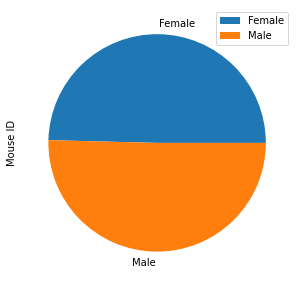

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data.plot(kind="pie", y= "Mouse ID", figsize= (5,5))

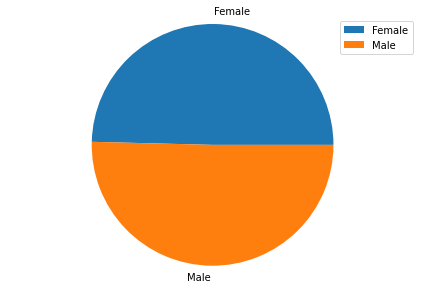

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_total, labels= mouse_sex)
plt.legend (labels= mouse_sex, loc="upper right")
plt.axis("equal")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Dataframe with top 4 (Capomulin, Ramicane, Infubinol, and Ceftamin)
top_drugs = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Sort by timepoint
top_drugs = top_drugs.sort_values(["Timepoint"], ascending=True)

# Grab needed columns
top_drugs_df= top_drugs[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
top_drugs_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1391,q132,Infubinol,0,45.000000
195,i738,Capomulin,0,45.000000
205,a520,Ramicane,0,45.000000
1370,p438,Ceftamin,0,45.000000
...,...,...,...,...
350,v923,Capomulin,45,40.658124
144,m957,Capomulin,45,33.329098
337,j119,Capomulin,45,38.125164
59,s508,Ramicane,45,30.276232


In [96]:
# Start by getting the last (greatest) timepoint for each mouse
max_time_df = top_drugs.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
max_time_data= max_time_df.to_frame()
max_time_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []
            

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

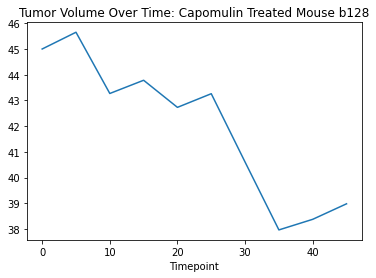

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse_df= combined_data.loc[combined_data["Mouse ID"] == "b128"]

# Set variables 
timepoint = capo_mouse_df["Timepoint"]
tumor_vol= capo_mouse_df["Tumor Volume (mm3)"]

# Plot the tumor volume
tumor_volume_line, = plt.plot(timepoint, tumor_vol)

# Show the chart, add labels
plt.xlabel("Timepoint")
plt.title("Tumor Volume Over Time: Capomulin Treated Mouse b128")
plt.show()

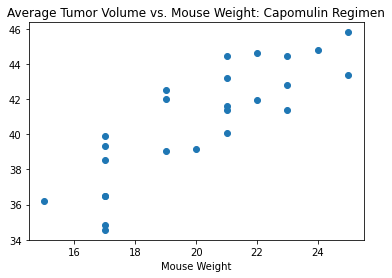

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Set variables
mouse_weight = capo_df.groupby(capo_df["Mouse ID"])["Weight (g)"].mean()
tumor_vol2 = capo_df.groupby(capo_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Plot the variables
plt.scatter(mouse_weight,tumor_vol2)
plt.xlabel("Mouse Weight")
plt.title("Average Tumor Volume vs. Mouse Weight: Capomulin Regimen")
plt.show()

## Correlation and Regression

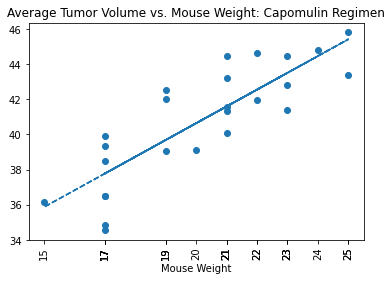

The correlation between mouse weight and tumor volume is 0.84


In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set variables (same as above)
mouse_weight = capo_df.groupby(capo_df["Mouse ID"])["Weight (g)"].mean()
tumor_vol2 = capo_df.groupby(capo_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform linear regression on mouse weight and avg tumor volume
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_vol2)
      
# Slope equation
fit = slope * mouse_weight + int

# Plot the line of best fit on top of scatter plot 
plt.scatter(mouse_weight,tumor_vol2)
plt.xlabel("Mouse Weight")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.title("Average Tumor Volume vs. Mouse Weight: Capomulin Regimen")
plt.show()

# Calculate and print correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_vol2)[0],2)
print(f'The correlation between mouse weight and tumor volume is {corr}')